### KNN 算法

#### 1.使用knn算法改进约会网站的配对效果

In [3]:
from numpy import *
import operator
from os import listdir

# 1.prepare data
def file2matrix(filename):
    love_dictionary={'largeDoses': 3, 'smallDoses': 2, 'didntLike': 1}
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)            # get the number of lines in the file
    returnMat = zeros((numberOfLines, 3))        # prepare matrix to return
    classLabelVector = []                       # prepare labels return   
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0: -1]
        if(listFromLine[-1].isdigit()):
            classLabelVector.append(int(listFromLine[-1]))
        else:
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

date_mat, class_label = file2matrix('./datingTestSet.txt')

In [5]:
date_mat[0: 5]
# class_label[0: 5]

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       [7.5136000e+04, 1.3147394e+01, 4.2896400e-01],
       [3.8344000e+04, 1.6697880e+00, 1.3429600e-01]])

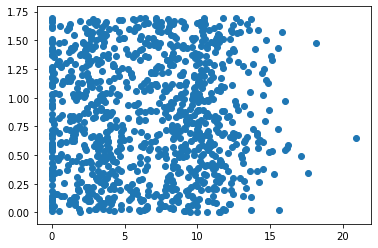

In [8]:
# 2.analysis data
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)  # split 1*1, and the first zone
ax.scatter(date_mat[:, 1], date_mat[:, 2])
plt.show()

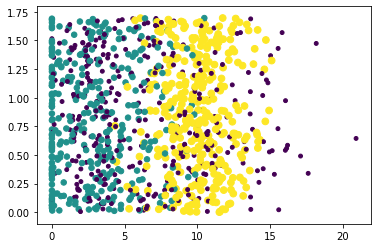

In [13]:
fig = plt.figure()
ax2 = fig.add_subplot(111)  # split 1*1, and the first zone
ax2.scatter(date_mat[:, 1], date_mat[:, 2], 15*array(class_label), 15*array(class_label))
plt.show()

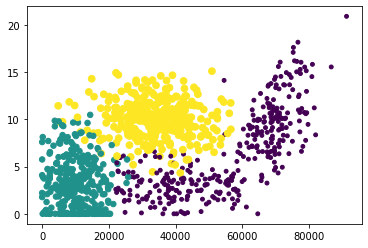

In [24]:
fig = plt.figure()
ax3 = fig.add_subplot(111)  # split 1*1, and the first zone
ax3.scatter(date_mat[:, 0], date_mat[:, 1], 15*array(class_label), 50*array(class_label))
plt.show()

In [26]:
# 2.2 normal data
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m, 1))
    normDataSet = normDataSet/tile(ranges, (m, 1))   # element wise divide
    return normDataSet, ranges, minVals

autoNorm(date_mat)[0: 5][0]

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [38]:
# 3.test classify
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]   # get rows
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()  # get index
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1  # d.get(key, defalt_v)
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

def datingClassTest():
    hoRatio = 0.50      # hold out 10%
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')       #load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m], 5)
        if (classifierResult != datingLabels[i]):
            print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
            errorCount += 1.0
    print("the total error rate is: %f" % (errorCount/float(numTestVecs)))
    print(errorCount)
    
datingClassTest()

the classifier came back with: 2, the real answer is: 1
the classifier came back with: 1, the real answer is: 2
the classifier came back with: 2, the real answer is: 3
the classifier came back with: 3, the real answer is: 2
the classifier came back with: 3, the real answer is: 2
the classifier came back with: 3, the real answer is: 1
the classifier came back with: 2, the real answer is: 3
the classifier came back with: 3, the real answer is: 2
the classifier came back with: 2, the real answer is: 1
the classifier came back with: 2, the real answer is: 3
the classifier came back with: 2, the real answer is: 3
the classifier came back with: 2, the real answer is: 3
the classifier came back with: 3, the real answer is: 1
the classifier came back with: 3, the real answer is: 1
the classifier came back with: 3, the real answer is: 1
the classifier came back with: 3, the real answer is: 1
the classifier came back with: 2, the real answer is: 3
the classifier came back with: 2, the real answe

In [32]:
# predict person
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input("percentage of time spent playing video games?"))
    ffMiles = float(input("frequent flier miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream, ])
    classifierResult = classify0((inArr - \
                                  minVals)/ranges, normMat, datingLabels, 5)
    print("You will probably like this person: %s" % resultList[classifierResult - 1])
    
classifyPerson()

percentage of time spent playing video games?10
frequent flier miles earned per year?10000
liters of ice cream consumed per year?0.5
You will probably like this person: in small doses


### 2.手写识别系统

In [33]:
# 1.convert img txt 32*32 into vector 1*1024
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

testVector = img2vector('./testDigits/0_13.txt')
print(testVector[0, 0:63])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [34]:
# 2.prepare data(norm data)
# for the sake of data value between 0 and 1, pass this step

In [45]:
# 3.test classify
def handwritingClassTest():
    hwLabels = []
    trainingFileList = os.listdir('./trainingDigits/')
    m = len(trainingFileList)
    trainingMat = zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i, :] = img2vector('./trainingDigits/%s' % fileNameStr)
    testFileList = listdir('./testDigits/')
    errorCount = 0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('./testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        if (classifierResult != classNumStr): 
            print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))
            errorCount += 1.0
    print("the total error rate is: %f" % (errorCount/float(mTest)))
    print(errorCount)
    
handwritingClassTest()

the classifier came back with: 1, the real answer is: 8
the classifier came back with: 3, the real answer is: 8
the classifier came back with: 7, the real answer is: 9
the classifier came back with: 9, the real answer is: 3
the classifier came back with: 1, the real answer is: 8
the classifier came back with: 1, the real answer is: 9
the classifier came back with: 1, the real answer is: 8
the classifier came back with: 7, the real answer is: 1
the classifier came back with: 6, the real answer is: 5
the classifier came back with: 3, the real answer is: 5
the classifier came back with: 6, the real answer is: 8
the total error rate is: 0.011628
11.0


In [44]:
def handwritingClassPredict(fileName):
    vector = img2vector(fileName)
    hwLabels = []
    trainingFileList = os.listdir('./trainingDigits/')
    m = len(trainingFileList)
    trainingMat = zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i, :] = img2vector('./trainingDigits/%s' % fileNameStr)
    classifierResult = classify0(vector, trainingMat, hwLabels, 3)
    return classifierResult

fileName = './testDigits/1_11.txt'
classifierResult = handwritingClassPredict(fileName)
print(classifierResult)

1
